 This script is used to produce Suplementary Figures of the manuscript
'Plasmid-mediated phenotypic noise leads to transient antibiotic resistance in bacteria'.

MIT License

Copyright (c) 2023 JCRHB/RPM


## Supplementary Figure 5

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from scipy.stats import linregress
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rootDir="/content/drive/MyDrive/SYNC_Projects/"

rootDir=rootDir+"pBGT/GIT/"

workingDir=rootDir+"code/Supplementary/"
data_path=rootDir+"data/supplementary/sFig-4/"
sfig_path=rootDir+"figures/SuppFigures/"

### LB AMP LB

In [4]:

files=['pBGTx4-G54Ux4-G55Ux4_AMP+SB-AMP_1-LB.txt', 'pBGTx4-G54Ux4-G55Ux4_AMP+SB-AMP_2-AMP.txt', 'pBGTx4-G54Ux4-G55Ux4_AMP+SB-AMP_3-LB.txt']
G54=["D5","C6","D7","C8","G5","F6","G7","F8"]
G54C=["B5","E5"]

G55=["D9","C10","D11","C12","G9","F10","G11","F12"]
G55C=["B9","E9"]

P=["G1","G2","G3","G4"]
PS=["D1","C2","D3","C4","F1","F2","F3","F4"]
PC=["B1","E1"]
namesSB=["1 - LB","2 - AMP+SB","3 - LB"]
names=["1 - LB","2 - AMP","3 - LB"]
namesS=["1 - LB","2 - AMP+SB","3 - LB"]
namesL=["1 - LB","2 - LB","3 - LB"]


strain_names=["MG/pBGT","MG/G54U","MG/G55U","MG/pBGT+SB"]
strain_names=["MG/pBGT","MG/G54U","MG/G55U"]
strain_cvs={'MG:GT': 0.2987388397648711,
'MG/pBGT': 0.4069278146209365,
'MG/G54U': 0.3103959038016186,
'MG/G55U': 0.40194224121493044}

### Read Data

In [5]:
dflist=[]
for i,this_file in enumerate(files):
    this_file=data_path+this_file
    df=pd.read_csv(this_file,sep='\t',skiprows=45,nrows=37,encoding="iso-8859-15",engine='python')
    times=list(df["Time"])
    this_size=len(times)
    dname=names[i]
    d_list=[dname]*this_size
    #print(df.tail())
    df_temp=pd.DataFrame({"Time":times,"day":d_list})

    df2=pd.merge(df,df_temp, on=["Time"])
    dflist.append(df2)
df_OD=pd.concat(dflist)
df_OD.tail(2)


dflist=[]
for i,this_file in enumerate(files):
    this_file=data_path+this_file
    df=pd.read_csv(this_file,sep='\t',skiprows=86,nrows=37,encoding="iso-8859-15",engine='python')
#    print(df.head())
    #print(df.tail())
    times=list(df["Time"])
    this_size=len(times)
    dname=names[i]
    d_list=[dname]*this_size

    df_temp=pd.DataFrame({"Time":times,"day":d_list})

    df2=pd.merge(df,df_temp, on=["Time"])
    dflist.append(df2)
df_GFP=pd.concat(dflist)
df_GFP.tail(2)

########
dflist=[]
for i,this_file in enumerate(files):
     this_file=data_path+this_file
     df=pd.read_csv(this_file,sep='\t',skiprows=127,nrows=37,encoding="iso-8859-15",engine='python')
     #print(df.head())
     #print(df.tail())
     times=list(df["Time"])
     this_size=len(times)
     dname=names[i]
     d_list=[dname]*this_size

     df_temp=pd.DataFrame({"Time":times,"day":d_list})

     df2=pd.merge(df,df_temp, on=["Time"])
     dflist.append(df2)
df_GFPOD=pd.concat(dflist)
df_GFPOD.tail(2)


,Time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H4,H5,H6,H7,H8,H9,H10,H11,H12,day
35,11:41:23,153834,188293,193098,160366,156585,139656,179410,121985,180793,...,191019,191304,172293,177874,168741,160678,142608,185079,140550,3 - LB
36,12:01:23,154044,188113,193087,160444,154725,142336,180557,121485,182877,...,190956,191223,170921,181330,168717,160885,144257,181759,143044,3 - LB


In [6]:
### Debackground GFPs and ODs and make DF

In [7]:
df_GFPODdbg=df_GFPOD.copy()

for key in df_GFPODdbg.keys():
    if(key in ["Time","day"]):
        continue

    this_well_od=df_OD[key]-0.08
    #this_well_od=df_OD[key]/min(df_OD[key])
    this_well_od=np.array([x if x>=0 else 0. for x in this_well_od ])
    #this_well_gfp=df_GFP[key]-15000
    this_well_gfp=df_GFP[key]-min(df_GFP[key])
    #this_well_gfp=df_GFP[key]/min(df_GFP[key])
    this_well_gfp=np.array([x if x>0 else 1000 for x in this_well_gfp ])
    this_vals=this_well_gfp/this_well_od

    df_GFPODdbg[key]=this_vals
display(df_GFPODdbg.head(2))
display(df_GFPODdbg.tail(2))

<ipython-input-7-939e97b80f69>:14: RuntimeWarning: divide by zero encountered in divide
  this_vals=this_well_gfp/this_well_od


,Time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H4,H5,H6,H7,H8,H9,H10,H11,H12,day
0,0:01:23,32750.000000,93222.222222,64000.000000,110555.555556,85888.888889,146428.571429,113300.000000,131125.0,21595.238095,...,151285.714286,90625.0,167375.0,144285.714286,190000.0,57105.263158,146142.857143,68578.947368,203000.000000,1 - LB
1,0:21:23,14086.956522,12750.000000,32285.714286,28250.000000,28625.000000,58000.000000,22777.777778,32750.0,14615.384615,...,28214.285714,14875.0,50000.0,68333.333333,16000.0,8588.235294,60142.857143,44461.538462,121428.571429,1 - LB


,Time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H4,H5,H6,H7,H8,H9,H10,H11,H12,day
35,11:41:23,26741.935484,78200.0,130000.000000,29875.0,25269.230769,11777.777778,53500.0,10622.641509,46875.0,...,145571.428571,109000.000000,49187.5,28909.090909,32250.0,34318.181818,15454.545455,95500.0,13121.212121,3 - LB
36,12:01:23,26866.666667,74700.0,129833.333333,28875.0,16560.000000,19638.888889,60200.0,9830.188679,69875.0,...,131142.857143,110714.285714,41000.0,52300.000000,30000.0,34545.454545,20666.666667,56625.0,22515.151515,3 - LB


## Fig S5A

		MG/pBGT - $\rho$=0.992 p=3.2e-33 m=942.9947
		MG/pBGT - $\rho$=0.986 p=5.1e-29 m=988.0988
		MG/pBGT - $\rho$=0.986 p=1.2e-28 m=303.6228
		MG/pBGT - $\rho$=0.99 p=4.8e-31 m=670.5686
MG/pBGT - $\rho$=0.994 p=2.8e-35 m=726.3212
		MG/G54U - $\rho$=0.946 p=1.0e-18 m=746.329
		MG/G54U - $\rho$=0.971 p=2.5e-23 m=690.4971
		MG/G54U - $\rho$=0.953 p=1.1e-19 m=354.8928
		MG/G54U - $\rho$=0.969 p=7.8e-23 m=356.8045
		MG/G54U - $\rho$=0.862 p=7.4e-12 m=167.8176
		MG/G54U - $\rho$=0.976 p=1.2e-24 m=542.8715
		MG/G54U - $\rho$=0.964 p=1.1e-21 m=261.554
		MG/G54U - $\rho$=0.965 p=6.4e-22 m=661.2339
MG/G54U - $\rho$=0.979 p=9.8e-26 m=472.75
		MG/G55U - $\rho$=0.059 p=7.3e-01 m=59.2696
		MG/G55U - $\rho$=0.858 p=1.2e-11 m=2396.5083
		MG/G55U - $\rho$=0.489 p=2.1e-03 m=696.6449
		MG/G55U - $\rho$=0.805 p=1.9e-09 m=1114.5088
		MG/G55U - $\rho$=0.852 p=2.2e-11 m=4501.345
		MG/G55U - $\rho$=0.855 p=1.6e-11 m=1635.2085
		MG/G55U - $\rho$=0.889 p=2.1e-13 m=1147.8813
		MG/G55U - $\rho$=0.496 p=1.8e-03 m=917

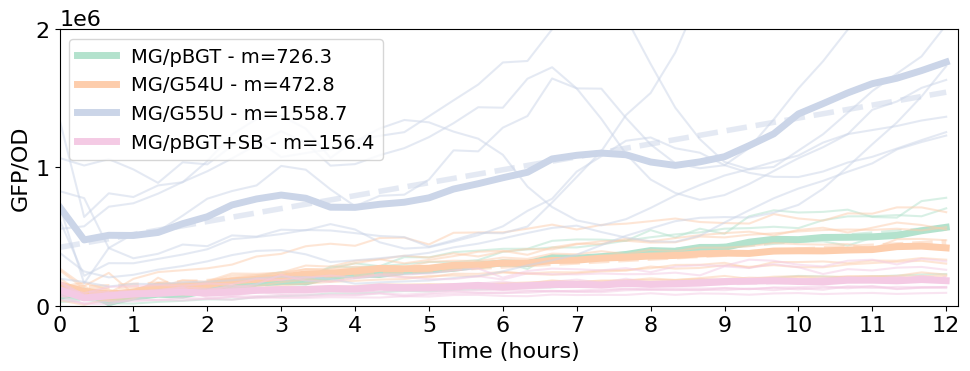

In [8]:

df_plt=df_GFPODdbg.copy()

colors=plt.cm.Pastel2(np.linspace(0, 1,9))

strain_list=[P,G54,G55,PS]
strain_names=["MG/pBGT","MG/G54U","MG/G55U","MG/pBGT+SB"]


#### Controls  (not plotted)
strain_listC=[PC,G54C,G55C]
strain_namesC=["MG/pBGT","MG/G54U","MG/G55U"]


##########################################

fig=plt.figure(figsize=(10, 4))
plt.rcParams.update({'font.size': 16})
strain_m_dict=dict.fromkeys(strain_names)
strain_m_reps_dict=dict.fromkeys(strain_names)

for istrain,this_strain in enumerate(strain_list):
    this_strain_name=strain_names[istrain]
    strain_m_reps_dict[this_strain_name]=[]
    for d,day in enumerate([names[1]]):  #### only antibiotic day
        subdf=df_plt[df_plt["day"]==day]
        time_span=list(subdf["Time"])
        time_span=[i*20+(12*60*d) for i,x in enumerate(time_span)]
        rep_ods_mean=[]
        for ir,rep in enumerate(this_strain):
            subsubdf=subdf[rep]
            ods=np.array(list(subsubdf))
            #ods=ods/ods[0]
            rep_ods_mean.append(ods)
            plt.plot(time_span,ods,alpha=.5,c=colors[istrain])

            lr_plot=linregress(time_span,ods)
            lry_plot=[x*lr_plot.slope+lr_plot.intercept for x in time_span]
            strain_m_reps_dict[this_strain_name].append(lr_plot.slope)
            print("\t\t%s - $\\rho$=%s p=%s m=%s"%(strain_names[istrain],round(lr_plot.rvalue,3),"{:.1e}".format(lr_plot.pvalue),round(lr_plot.slope,4)))
        rep_ods_mean=np.mean(rep_ods_mean,axis=0)
        lr_plot=linregress(time_span,rep_ods_mean)
        lry_plot=[x*lr_plot.slope+lr_plot.intercept for x in time_span]
        plt.plot(time_span,lry_plot,lw=4,ls="--",alpha=.5,c=colors[istrain])
#         plt.annotate(r"$R^2$: ""%s\np-value:%s"%(round(lr_plot.rvalue**2,3),"{:.1e}".format(lr_plot.pvalue)), xy=(0.6, 0.8), xycoords='axes fraction')
        if(d==0):
            #plt.plot(time_span,rep_ods_mean,alpha=1,lw=5,c=colors[istrain],label="%s - $\\rho$=%s p=%s m=%s"%(strain_names[istrain],round(lr_plot.rvalue,3),"{:.1e}".format(lr_plot.pvalue),round(lr_plot.slope,4)))
            plt.plot(time_span,rep_ods_mean,alpha=1,lw=5,c=colors[istrain],label="%s - m=%s"%(strain_names[istrain],round(lr_plot.slope,1)))
            print("%s - $\\rho$=%s p=%s m=%s"%(strain_names[istrain],round(lr_plot.rvalue,3),"{:.1e}".format(lr_plot.pvalue),round(lr_plot.slope,4)))
        else:
            plt.plot(time_span,rep_ods_mean,alpha=1,lw=5,c=colors[istrain])
        strain_m_dict[this_strain_name]=lr_plot.slope


plt.ylim([0,2e6])
plt.yticks([0,1e6,2e6])
xticks=[60*i for i in range(13)]
xticks_names=[i for i in range(13)]
#plt.yscale("log")
plt.xlim([0,12*60+10])
plt.xticks(xticks,labels=xticks_names)
plt.ylabel("GFP/OD")
plt.xlabel("Time (hours)")
plt.legend(fontsize=14,loc=2)
plt.tight_layout()

#out_fig_name=fig_path+"sFig-5A.pdf"
#print("Saving fig as: \n",out_fig_name)
#plt.savefig(out_fig_name,bbox_inches = 'tight',pad_inches = 0.1)

plt.show()


		MG/pBGT - $\rho$=0.992 p=3.2e-33
		MG/pBGT - $\rho$=0.986 p=5.1e-29
		MG/pBGT - $\rho$=0.986 p=1.2e-28
		MG/pBGT - $\rho$=0.99 p=4.8e-31
MG/pBGT - $\rho$=0.994 p=2.8e-35 m=726.3212
		MG/G54U - $\rho$=0.946 p=1.0e-18
		MG/G54U - $\rho$=0.971 p=2.5e-23
		MG/G54U - $\rho$=0.953 p=1.1e-19
		MG/G54U - $\rho$=0.969 p=7.8e-23
		MG/G54U - $\rho$=0.862 p=7.4e-12
		MG/G54U - $\rho$=0.976 p=1.2e-24
		MG/G54U - $\rho$=0.964 p=1.1e-21
		MG/G54U - $\rho$=0.965 p=6.4e-22
MG/G54U - $\rho$=0.979 p=9.8e-26 m=472.75
		MG/G55U - $\rho$=0.059 p=7.3e-01
		MG/G55U - $\rho$=0.858 p=1.2e-11
		MG/G55U - $\rho$=0.489 p=2.1e-03
		MG/G55U - $\rho$=0.805 p=1.9e-09
		MG/G55U - $\rho$=0.852 p=2.2e-11
		MG/G55U - $\rho$=0.855 p=1.6e-11
		MG/G55U - $\rho$=0.889 p=2.1e-13
		MG/G55U - $\rho$=0.496 p=1.8e-03
MG/G55U - $\rho$=0.946 p=1.1e-18 m=1558.6514
		MG/pBGT+SB - $\rho$=0.955 p=3.9e-20
		MG/pBGT+SB - $\rho$=0.909 p=7.7e-15
		MG/pBGT+SB - $\rho$=0.93 p=9.7e-17
		MG/pBGT+SB - $\rho$=0.86 p=8.9e-12
		MG/pBGT+SB - $\rho

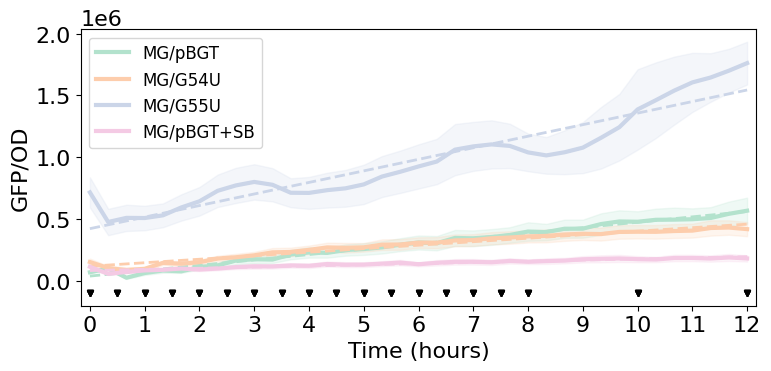

In [9]:
fig=plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 16})
strain_m_dict=dict.fromkeys(strain_names)
strain_m_reps_dict=dict.fromkeys(strain_names)

for istrain,this_strain in enumerate(strain_list):
    this_strain_name=strain_names[istrain]
    strain_m_reps_dict[this_strain_name]=[]
    for d,day in enumerate([names[1]]):  #### only antibiotic day
        subdf=df_plt[df_plt["day"]==day]
        time_span=list(subdf["Time"])
        time_span=[i*20+(12*60*d) for i,x in enumerate(time_span)]
        rep_ods=[]
        nreps=0
        for ir,rep in enumerate(this_strain):
            subsubdf=subdf[rep]
            ods=np.array(list(subsubdf))
            rep_ods.append(ods)

            lr_plot=linregress(time_span,ods)
            strain_m_reps_dict[this_strain_name].append(lr_plot.slope)
            print("\t\t%s - $\\rho$=%s p=%s"%(strain_names[istrain],round(lr_plot.rvalue,3),"{:.1e}".format(lr_plot.pvalue)))
            nreps+=1

        rep_ods=np.array(rep_ods)
        rep_ods_mean=np.mean(rep_ods,axis=0)
        rep_ods_std=np.std(rep_ods,axis=0)/np.sqrt(nreps)
        lr_plot=linregress(time_span,rep_ods_mean)

        lry_plot=[x*lr_plot.slope+lr_plot.intercept for x in time_span]
        plt.plot(time_span,lry_plot,lw=2,ls="--",alpha=1,c=colors[istrain])
        if(d==0):
            plt.fill_between(time_span, rep_ods_mean-rep_ods_std, rep_ods_mean+rep_ods_std, alpha=0.2, color=colors[istrain])
            #plt.plot(time_span,rep_ods_mean,alpha=1,lw=3,c=colors[istrain],label="%s - m=%s"%(strain_names[istrain],round(lr_plot.slope,1)))
            plt.plot(time_span,rep_ods_mean,alpha=1,lw=3,c=colors[istrain],label="%s"%(strain_names[istrain]))

            print("%s - $\\rho$=%s p=%s m=%s"%(strain_names[istrain],round(lr_plot.rvalue,3),"{:.1e}".format(lr_plot.pvalue),round(lr_plot.slope,4)))
        else:
            plt.plot(time_span,rep_ods_mean,alpha=1,lw=3,c=colors[istrain])

        strain_m_dict[this_strain_name]=lr_plot.slope

        t_sample = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 10, 12]
        # Plot triangles at each t_sample
        for t in t_sample:
            plt.plot(t*60, -1e5, 'v', color='black', markersize=5)


plt.xlim([-10,12*60+10])
plt.xticks(xticks,labels=xticks_names)
plt.ylabel("GFP/OD")
plt.xlabel("Time (hours)")
plt.legend(fontsize=12,loc=2)
plt.tight_layout()

out_fig_name=sfig_path+"sFig-5A.pdf"
print("Saving fig as: \n",out_fig_name)
plt.savefig(out_fig_name,bbox_inches = 'tight',pad_inches = 0.1)

plt.show()

## Fig S5B

In [10]:
### Data from Figure 3D
strain_t50_dict={'MG:GT': 65, 'MG/pBGT': 81, 'MG/G54U': 80, 'MG/G55U': 95}
strain_t50_dict

{'MG:GT': 65, 'MG/pBGT': 81, 'MG/G54U': 80, 'MG/G55U': 95}

Saving fig as: 
 /content/drive/MyDrive/SYNC_Projects/pBGT/GIT/figures/SuppFigures/sFig-5B.pdf


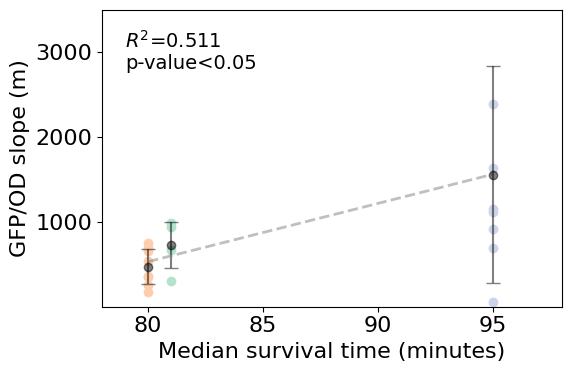

In [11]:
colors = sns.color_palette('Pastel2', n_colors=4)
color_MG = (0, 0, 0)
color_pBGT = colors[0]
color_G54U = colors[1]
color_G55U = colors[2]

plot_colors=[color_pBGT,color_G54U,color_G55U]

xxA=[]
yyA=[]
for strain in strain_names[:-1]:
    x=strain_t50_dict[strain]
    #xx.append(x)
    for y in strain_m_reps_dict[strain]:
        xxA.append(x)
        yyA.append(y)

fig, ax1 = plt.subplots(figsize=(6, 4))
plt.rcParams.update({'font.size': 16})
fig.set_facecolor('white')

for i,strain in enumerate(strain_names[:-1]):
    x=strain_t50_dict[strain]
    xx=[]
    yy=[]
    for y in strain_m_reps_dict[strain]:
        xx.append(x)
        yy.append(y)

    plt.scatter(xx, yy, color=plot_colors[i], alpha=1)

    y_mean = np.mean(yy)
    y_sem = np.std(yy)   # standard error over the mean
    plt.errorbar(x, y_mean, yerr=y_sem, fmt="o", ecolor='k', capsize=5, alpha=0.5, markeredgecolor='k', markerfacecolor='k')


ax1.set_xlabel("Median survival time (minutes)")
ax1.set_ylabel("GFP/OD slope (m)")#,color=color)

lr_plot=linregress(xxA,yyA)
newx=[x for x in range(min(xxA),max(xxA)+1)]
lry_plot=[x*lr_plot.slope+lr_plot.intercept for x in newx]
plt.plot(newx,lry_plot,lw=2,ls="--",alpha=.5,c='gray')

if lr_plot.pvalue<0.05:
  lbl_pvalue='<0.05'

ax1.annotate(r"$R^2$=""%s \np-value%s"%(round(lr_plot.rvalue,3),lbl_pvalue), xy=(0.05, 0.8), xycoords='axes fraction',fontsize=14)
plt.tight_layout()
plt.yticks([1000, 2000, 3000])
plt.xlim([78, 98])
plt.ylim([0, 3500])

out_fig_name=sfig_path+"sFig-5B.pdf"
print("Saving fig as: \n",out_fig_name)
plt.savefig(out_fig_name,bbox_inches = 'tight',pad_inches = 0.1)
plt.show()